# Crops Yield Prediction 
 
We studied crop yield for Australia from 1990 to 2019. Crop yield prediction is an important food security problem, and primarily depends on several factors such as weather conditions (rain, temperature, etc), fertiliser, pesticides. Historical knowledge about crop yield is important for making decisions and future predictions.

In this exercise we adopted machine learning methods to predict 7 popular crops in Australia using available data from FAO and World Data Bank.

We used regression analysis to investigate the relationship between a dependent/target (crops) and independent variables/predictor (fertilizer types and rainfall) to select the right model. The regression model we used for this exercise include:
- Random Forest
- Decision Tree
- SVM

Knowling the right model for the data, we further analysed by using the classification method to test the accuracy of best fit model

Crops include :           
- Almond
- Apple
- Barley                
- Maize            
- Oats                   
- Sorghum               
- Wheat            

The data used in this project were sourced from FAO and World Data Bank. 

References

http://www.fao.org/home/en/

https://data.worldbank.org/

https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset

https://www.agric.wa.gov.au/climate-weather/potential-yield-tool/

# Visualising processed data

In [1]:
# Import libraries for datasets
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv('merged_data_edit.csv')
dataset.shape

(210, 7)

In [3]:
dataset.head()

,Year,mean rainfall,Crop,Value(hg/ha),Nitrogen,Phosphate,Potassium
0,1990,33.43,"Almonds, with shell",16667,439400,583783.6,145373.54
1,1990,33.43,Apples,151376,439400,583783.6,145373.54
2,1990,33.43,Barley,16766,439400,583783.6,145373.54
3,1990,33.43,Maize,41821,439400,583783.6,145373.54
4,1990,33.43,Oats,14659,439400,583783.6,145373.54


In [4]:
dataset.tail()

,Year,mean rainfall,Crop,Value(hg/ha),Nitrogen,Phosphate,Potassium
205,2019,22.51,Barley,19878,1337593,957503.11,288016.25
206,2019,22.51,Maize,55507,1337593,957503.11,288016.25
207,2019,22.51,Oats,12094,1337593,957503.11,288016.25
208,2019,22.51,Sorghum,21089,1337593,957503.11,288016.25
209,2019,22.51,Wheat,16917,1337593,957503.11,288016.25


Looking at the columns in the csv, we can rename **Value** to **hg/ha_yield** to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [5]:
# rename columns.
dataset = dataset.rename(index=str, columns={"Value(hg/ha)": "Yield_hg/ha"})
dataset.head()

,Year,mean rainfall,Crop,Yield_hg/ha,Nitrogen,Phosphate,Potassium
0,1990,33.43,"Almonds, with shell",16667,439400,583783.6,145373.54
1,1990,33.43,Apples,151376,439400,583783.6,145373.54
2,1990,33.43,Barley,16766,439400,583783.6,145373.54
3,1990,33.43,Maize,41821,439400,583783.6,145373.54
4,1990,33.43,Oats,14659,439400,583783.6,145373.54


In [6]:
dataset.groupby('Crop').mean()

,Year,mean rainfall,Yield_hg/ha,Nitrogen,Phosphate,Potassium
Crop,,,,,,
"Almonds, with shell",2004.5,38.972333,45741.900000,969202.066667,935854.811667,216398.761667
Apples,2004.5,38.972333,158059.233333,969202.066667,935854.811667,216398.761667
Barley,2004.5,38.972333,19061.266667,969202.066667,935854.811667,216398.761667
Maize,2004.5,38.972333,56736.700000,969202.066667,935854.811667,216398.761667
Oats,2004.5,38.972333,15430.933333,969202.066667,935854.811667,216398.761667
Sorghum,2004.5,38.972333,26613.000000,969202.066667,935854.811667,216398.761667
Wheat,2004.5,38.972333,17743.566667,969202.066667,935854.811667,216398.761667


In [7]:
dataset.describe()

,Year,mean rainfall,Yield_hg/ha,Nitrogen,Phosphate,Potassium
count,210.000000,210.000000,210.000000,2.100000e+02,2.100000e+02,210.000000
mean,2004.500000,38.972333,48483.800000,9.692021e+05,9.358548e+05,216398.761667
std,8.676124,7.373306,48300.447992,2.928505e+05,1.416013e+05,39487.343862
min,1990.000000,22.510000,7463.000000,4.394000e+05,5.837836e+05,142074.140000
25%,1997.000000,35.140000,18337.250000,8.350180e+05,8.423695e+05,188033.240000
50%,2004.500000,38.125000,25318.000000,9.622200e+05,9.561669e+05,220140.045000
75%,2012.000000,41.700000,56227.500000,1.124607e+06,1.041740e+06,239894.890000
max,2019.000000,55.880000,220805.000000,1.493809e+06,1.197014e+06,293693.530000


Dataframe shows data starts from 1997 to 2019 

In [8]:
dataset.head()

,Year,mean rainfall,Crop,Yield_hg/ha,Nitrogen,Phosphate,Potassium
0,1990,33.43,"Almonds, with shell",16667,439400,583783.6,145373.54
1,1990,33.43,Apples,151376,439400,583783.6,145373.54
2,1990,33.43,Barley,16766,439400,583783.6,145373.54
3,1990,33.43,Maize,41821,439400,583783.6,145373.54
4,1990,33.43,Oats,14659,439400,583783.6,145373.54


In [9]:
# Describing the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           210 non-null    int64  
 1   mean rainfall  210 non-null    float64
 2   Crop           210 non-null    object 
 3   Yield_hg/ha    210 non-null    int64  
 4   Nitrogen       210 non-null    int64  
 5   Phosphate      210 non-null    float64
 6   Potassium      210 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 13.1+ KB


Data shows a non-zero values with all coluums being in right type

In [10]:
# Import librariries
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\mafak\AppData\Local\Temp/ipykernel_29216/92109168.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


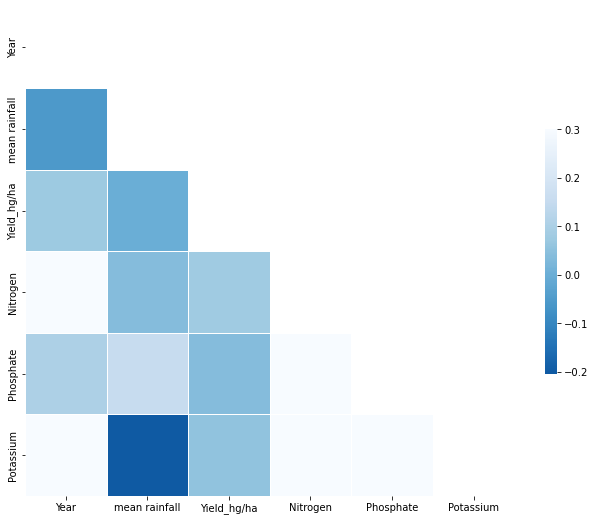

In [11]:
# Correlation test on the datasets from each column
correlation_data=dataset.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="Blues_r"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Correlation map shows there is no correlation between any of the colmuns in the dataframe

# Machine learning processing: Encoding Categorical Variables:

Data has one categorical column in the dataframe (i.e. crops) that contains label values instead of numerical values. Most machine learning algorithms effectviely operate on numerical data rather than directly on label data. For this reason we converted the categorical data/column for crop to a numerical form using ONE-HOT ENCODING. One hot encoding is an approach by means of which categorical variables are converted so they can be provided to ML algorithms to improve prediction. For that purpose, One-Hot Encoding has been used to convert the crop columns to one-hot numeric array.

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
dataset_onehot = pd.get_dummies(dataset, columns=["Crop"], prefix = ["Crop"])
features=dataset_onehot.loc[:, dataset_onehot.columns != 'Yield_hg/ha']
label=dataset['Yield_hg/ha']
features.head()

#,"Nitrogen","Phosphate","Potassium"
#,"Nitrogen","Phosphate","Potassium"

,Year,mean rainfall,Nitrogen,Phosphate,Potassium,"Crop_Almonds, with shell",Crop_Apples,Crop_Barley,Crop_Maize,Crop_Oats,Crop_Sorghum,Crop_Wheat
0,1990,33.43,439400,583783.6,145373.54,1,0,0,0,0,0,0
1,1990,33.43,439400,583783.6,145373.54,0,1,0,0,0,0,0
2,1990,33.43,439400,583783.6,145373.54,0,0,1,0,0,0,0
3,1990,33.43,439400,583783.6,145373.54,0,0,0,1,0,0,0
4,1990,33.43,439400,583783.6,145373.54,0,0,0,0,1,0,0


In [14]:
features = features.drop(['Year'], axis=1)

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mean rainfall             210 non-null    float64
 1   Nitrogen                  210 non-null    int64  
 2   Phosphate                 210 non-null    float64
 3   Potassium                 210 non-null    float64
 4   Crop_Almonds, with shell  210 non-null    uint8  
 5   Crop_Apples               210 non-null    uint8  
 6   Crop_Barley               210 non-null    uint8  
 7   Crop_Maize                210 non-null    uint8  
 8   Crop_Oats                 210 non-null    uint8  
 9   Crop_Sorghum              210 non-null    uint8  
 10  Crop_Wheat                210 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 9.6+ KB


In [16]:
features.head()

,mean rainfall,Nitrogen,Phosphate,Potassium,"Crop_Almonds, with shell",Crop_Apples,Crop_Barley,Crop_Maize,Crop_Oats,Crop_Sorghum,Crop_Wheat
0,33.43,439400,583783.6,145373.54,1,0,0,0,0,0,0
1,33.43,439400,583783.6,145373.54,0,1,0,0,0,0,0
2,33.43,439400,583783.6,145373.54,0,0,1,0,0,0,0
3,33.43,439400,583783.6,145373.54,0,0,0,1,0,0,0
4,33.43,439400,583783.6,145373.54,0,0,0,0,1,0,0



### Scaling of features

From the dataset above, the magnitude of the features have high variation (in terms of units and range). This condition caused features with high magnitudes to weigh more than features with low magnitudes in the distance calculations. To deal with this all features need to be brought to the same level of magnitudes. This can be acheived by scaling.

In [17]:
# Import scaling library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

After dropping year column in addition to scaling all values in features, the resulting array will look something like this : 

In [18]:
features

array([[0.32724004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32724004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32724004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.85184497, 0.60942803, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.85184497, 0.60942803, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.85184497, 0.60942803, ..., 0.        , 0.        ,
        1.        ]])

## Training data 

We adopted the 80/20 rule for training/testing of dataset. The test dataset is used to assess how well ML algorithm is trained with the training dataset

In [19]:
# Import train/test library
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=0)

In [20]:
# Final df to csv file 
dataset.to_csv('dataset.csv')

# Compare models & selection 
We used different models to compare and choose the best one that fits this specific dataset. For this project, we are comparing between the following models : 
- Random Forest Regressor
- SVM 
- Decision Tree Regressor
- Logistic Regression

In [21]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
models = [
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor(), logreg 
]

In [23]:
model_train=list(map(compare_models,models)) 

In [24]:
print(*model_train, sep = "\n")

['RandomForestRegressor', 0.9730654603138797]
['SVR', -0.2505565930471332]
['DecisionTreeRegressor', 0.971326297408008]
['LogisticRegression', 0.9728410084620452]


From results, **Random Forest Regressor** and **Logistic Regression** have the highest R^2 score 0f **96%**, followed by **Decison Tree Regressor**; the **SVM** is not a good modelling tool for the type of data

In [25]:
dataset_onehot = dataset_onehot.drop(['Year'], axis=1)

In [26]:
dataset_onehot.head()

,mean rainfall,Yield_hg/ha,Nitrogen,Phosphate,Potassium,"Crop_Almonds, with shell",Crop_Apples,Crop_Barley,Crop_Maize,Crop_Oats,Crop_Sorghum,Crop_Wheat
0,33.43,16667,439400,583783.6,145373.54,1,0,0,0,0,0,0
1,33.43,151376,439400,583783.6,145373.54,0,1,0,0,0,0,0
2,33.43,16766,439400,583783.6,145373.54,0,0,1,0,0,0,0
3,33.43,41821,439400,583783.6,145373.54,0,0,0,1,0,0,0
4,33.43,14659,439400,583783.6,145373.54,0,0,0,0,1,0,0


In [27]:
#setting test data to columns from dataframe and excluding 'Yield_hg/ha' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=dataset_onehot.loc[:, dataset_onehot.columns != 'Yield_hg/ha'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

crp=test_df[[col for col in test_df.columns if 'Crop' in col]].stack()[test_df[[col for col in test_df.columns if 'Crop' in col]].stack()>0]
crplist=list(pd.DataFrame(crp).index.get_level_values(1))
crops=[i.split("_")[1] for i in crplist]
#itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
#itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
#items=[i.split("_")[1] for i in itmlist]

In [28]:
test_df.head()

,mean rainfall,Nitrogen,Phosphate,Potassium,"Crop_Almonds, with shell",Crop_Apples,Crop_Barley,Crop_Maize,Crop_Oats,Crop_Sorghum,Crop_Wheat
0,0.471681,0.021718,0.166584,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.635301,0.563918,1.000000,0.658767,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.144741,0.136380,0.565368,0.511055,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.327240,0.000000,0.000000,0.021761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.669164,0.981321,0.594258,0.747225,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
#test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Crop' in col],axis=1,inplace=True)
test_df.head()

,mean rainfall,Nitrogen,Phosphate,Potassium
0,0.471681,0.021718,0.166584,0.000000
1,0.635301,0.563918,1.000000,0.658767
2,0.144741,0.136380,0.565368,0.511055
3,0.327240,0.000000,0.000000,0.021761
4,0.669164,0.981321,0.594258,0.747225


In [30]:
test_df['Crop']=crops
#test_df['Item']=items
test_df.head()

,mean rainfall,Nitrogen,Phosphate,Potassium,Crop
0,0.471681,0.021718,0.166584,0.000000,Sorghum
1,0.635301,0.563918,1.000000,0.658767,Maize
2,0.144741,0.136380,0.565368,0.511055,Sorghum
3,0.327240,0.000000,0.000000,0.021761,Sorghum
4,0.669164,0.981321,0.594258,0.747225,Wheat


# Random forest - classification for crops

In [31]:
# Creat variables to define dependent and independent variables
features = ['mean rainfall','Yield_hg/ha','Nitrogen','Phosphate','Potassium']
target = ['Crop']

# Split the data up into features and labels
X = dataset[features]
y = dataset[target]

In [32]:
# Test size to 20% of whole dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
# Data Preprocessing
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,dataset[col].min(),dataset[col].max()))

mean rainfall (min,max): 	 	 22.51 55.88
Yield_hg/ha (min,max): 	 	 7463.00 220805.00
Nitrogen (min,max): 	 	 439400.00 1493809.00
Phosphate (min,max): 	 	 583783.60 1197013.53
Potassium (min,max): 	 	 142074.14 293693.53


The different features in the dataset have different range such as yield, nitrogen, phosphate and potassium having higher numbers than mean rainfall. Again this was rescaled to the range of 0 and 1.

In [34]:
# scale inputs - apply the scaling after splitting data into training and test, to avoid bias in the training,
# as scaling would depend on the test data which 

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
mmscaler = MinMaxScaler() 
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.transform(X_test)

# Change labels to numerical values 
y_train = LabelEncoder().fit_transform(np.asarray(y_train).ravel())
y_test = LabelEncoder().fit_transform(np.asarray(y_test).ravel())

In [35]:
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,X_train[:,ii].min(),X_train[:,ii].max()))

mean rainfall (min,max): 	 	 0.00 1.00
Yield_hg/ha (min,max): 	 	 0.00 1.00
Nitrogen (min,max): 	 	 0.00 1.00
Phosphate (min,max): 	 	 0.00 1.00
Potassium (min,max): 	 	 0.00 1.00


In [36]:
# Use classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
model = RandomForestClassifier()

# Fit the model to the training data 
model.fit(X_train,y_train)

# get predictions on the test data 
y_pred=model.predict(X_test)

# print training and test accuracy
print('Training Accuracy: {:.1f}%, Test Accuracy: {:.1f}%'.format(metrics.accuracy_score(y_train,model.predict(X_train))*100,metrics.accuracy_score(y_test,model.predict(X_test))*100))

Training Accuracy: 100.0%, Test Accuracy: 26.2%


# Evaluation - confusion matrix

In [37]:
# Types of crops in the data
crop_types = dataset['Crop'].unique()
print(crop_types)

['Almonds, with shell' 'Apples' 'Barley' 'Maize' 'Oats' 'Sorghum' 'Wheat']


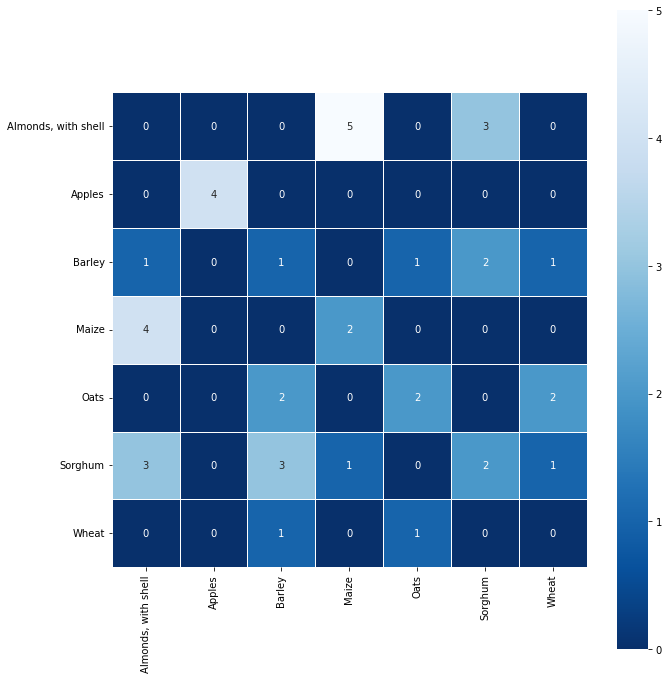

In [38]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_pred,y_test),square=True,cmap='Blues_r',annot=True,fmt=".0f",linewidths=.5)
ax = plt.gca()
_ = ax.set_xticklabels(crop_types,rotation='vertical')
_ = ax.set_yticklabels(crop_types,rotation='horizontal')
plt.tight_layout()

The matrix has non-zeros in the off-diagonals suggest model is not 100% (or retruned a wrong label)

# Precision, recall 

In [39]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       1.00      1.00      1.00         4
           2       0.14      0.17      0.15         6
           3       0.25      0.33      0.29         6
           4       0.50      0.33      0.40         6
           5       0.29      0.20      0.24        10
           6       0.00      0.00      0.00         2

    accuracy                           0.26        42
   macro avg       0.31      0.29      0.30        42
weighted avg       0.29      0.26      0.27        42



Precision - dictates true positive prediction; from above 66% is true positive and 34% is false positive
Recall - this is how often the algorithm returned correct class; from above, 32% of the cases were right

# Visualising decision tree

Training Accuracy: 67.3%, Test Accuracy: 21.4%
there are 100 trees in the forest


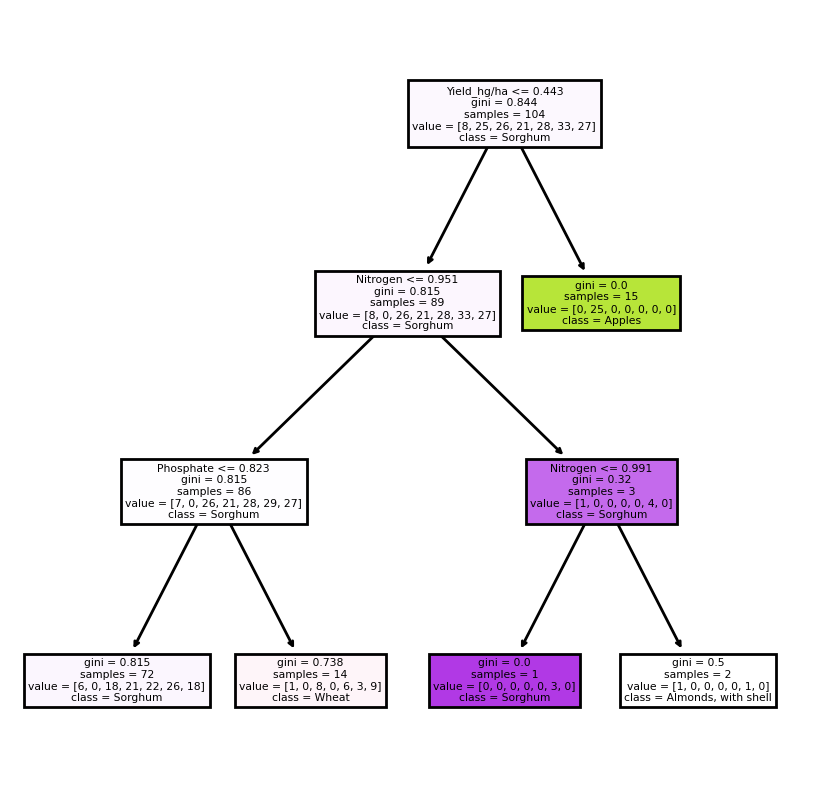

In [40]:
from sklearn import tree

# Fit forest with a maximum depth of 3 easy visualisation
small_rf = RandomForestClassifier(max_depth=3)

# Fitting the forest to the training data 
small_rf.fit(X_train,y_train)

# Pedictions on the test data 
y_pred=small_rf.predict(X_test)

# print training and test accuracy
print('Training Accuracy: {:.1f}%, Test Accuracy: {:.1f}%'.format(metrics.accuracy_score(y_train,small_rf.predict(X_train))*100,metrics.accuracy_score(y_test,small_rf.predict(X_test))*100))

# Get list of decision trees
trees = small_rf.estimators_

# Number of trees 
print('there are {n} trees in the forest'.format(n=len(trees)))

# Visualise the first tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5),dpi=200)
tree.plot_tree(trees[0],
               feature_names = features, 
               class_names=crop_types,
               filled = True);

# Feature selection - visualising the important features

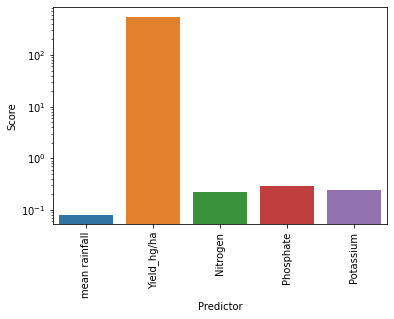

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
selector = SelectKBest(score_func=f_classif,k='all')
X_train_kbest = selector.fit_transform(X_train,np.asarray(y_train).ravel())
scores = selector.scores_

X_test_kbest = selector.transform(X_test)
mask = selector.get_support() 

#list of booleans
new_features = [] 
scores = scores[mask==True]
for bool, feature in zip(mask, features):
    if bool:
        new_features.append(feature)
        
_ = sns.barplot(x=new_features,y=scores,log=True)
plt.ylabel('Score')
plt.xlabel('Predictor' )
_= plt.xticks(ticks=np.arange(X_train_kbest.shape[-1]),labels=new_features,rotation='vertical')

Yield has the highest importance in the decision making for the model as it's the highest predictor in the dataset. We also see the effect of fertilizers, where phosphate and potassium have the second and third importance features

# Comparison with other classifiers

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
models = []
models.append(('LogisticRegression',LogisticRegression(max_iter=5000)))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('SVM',SVC()))

# same as above, but in cross-validation
nfolds = 10
print('{} fold cv'.format(nfolds))
X_cv = np.asarray(X)
y_cv = LabelEncoder().fit_transform(np.asarray(y).ravel())

for name,model in models:
    # apply transformation to each individual fold
    pipeline = Pipeline([('transformer', MinMaxScaler()), ('estimator', model)])    
    scores = cross_val_score(pipeline, X_cv,y_cv , cv=nfolds)
    print(name, np.round(scores.mean(),3))

10 fold cv
LogisticRegression 0.429
DecisionTreeClassifier 0.543
RandomForestClassifier 0.557
SVM 0.5
